In [ ]:
import os
import json


In [ ]:
def collect_contract_occurrences(json_file_path, contract_name):
    try:
        with open(json_file_path, 'r') as file:
            data = json.load(file)
        
        occurrences = []
        index = 1
        
        for entry in data:
            if entry['contract'].startswith(contract_name):
                occurrences.append(f"{contract_name}-{index}")
                index += 1
        
        return occurrences
    
    except FileNotFoundError:
        return "The JSON file does not exist."
    except json.JSONDecodeError:
        return "Error decoding JSON file."
    except Exception as e:
        return f"An error occurred: {e}"

In [ ]:
def list_files_in_directory(directory_path):
    try:
        # List all files in the directory
        files = os.listdir(directory_path)
        
        # Filter out directories, keep only files
        files = [f for f in files if os.path.isfile(os.path.join(directory_path, f))]
        
        return files
    except FileNotFoundError:
        return "The directory does not exist."
    except PermissionError:
        return "You do not have permission to access this directory."
    except Exception as e:
        return f"An error occurred: {e}"

In [ ]:
directory_path = '../results/auction'
files = list_files_in_directory(directory_path)

In [ ]:
failed_file_path = '../results/json/failed_exploits.json'
unresolved_file_path = '../results/json/unresolved_exploits.json'
contract_name = 'PrizeDistribution'

failed_occurrences = collect_contract_occurrences(failed_file_path, contract_name)
unresolved_occurrences = collect_contract_occurrences(unresolved_file_path, contract_name)

print(failed_occurrences.__len__())
print(unresolved_occurrences.__len__())

In [ ]:
dir_address = '../results/partly-exploitable'
list_of_party_and_completely_exploitables = list_files_in_directory(dir_address)
counts = dict()
for file in list_of_party_and_completely_exploitables:
    with open(dir_address+'/'+file, 'r') as file_object:
        length = len(file_object.readlines()) - 2
        if length in counts:
            counts[length] += 1
        else:
            counts[length] = 1

dir_address = '../results/all-exploit-results'
list_of_all = list_files_in_directory(dir_address)
counts_all = dict()
for file in list_of_all:
    with open(dir_address+'/'+file, 'r') as file_object:
        length = len(file_object.readlines()) - 2
        if length in counts_all:
            counts_all[length] += 1
        else:
            counts_all[length] = 1


dir_address = '../results/containing-violation'
list_of_violations = list_files_in_directory(dir_address)
counts_violation = dict()
for file in list_of_violations:
    with open(dir_address+'/'+file, 'r') as file_object:
        length = len(file_object.readlines()) - 2
        if length in counts_violation:
            counts_violation[length] += 1
        else:
            counts_violation[length] = 1
# counts_all is {1: 30, 2: 24, 3: 8, 6: 1, 7: 1, 10: 1, 4: 1, 12: 1, 5: 1, 0: 23}
# counts is {2: 12, 1: 15, 3: 5, 6: 1, 7: 1, 10: 1, 12: 1, 5: 1}

In [ ]:

dir_address = '../results/all-exploit-results'
list_of_all = list_files_in_directory(dir_address)
counts_all = dict()
total_tx = 0
for file in list_of_all:
    with open(dir_address+'/'+file, 'r') as file_object:
        length = len(file_object.readlines()) - 2
        total_tx += length
        if length in counts_all:
            counts_all[length] += 1
        else:
            counts_all[length] = 1
print(total_tx)

In [ ]:
print(counts)
print(counts_all)
print(counts_violation)
print(sum(counts.values()))
print(sum(counts_all.values()))
print(sum(counts_violation.values()))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
all_synthesized_exploits = {1: 30, 2: 24, 3: 8, 6: 1, 7: 1, 10: 1, 4: 1, 12: 1, 5: 1}
all_containing_violation = {2: 21, 3: 8, 1: 16, 6: 1, 7: 1, 10: 1, 4: 1, 12: 1, 5: 1}

# Keys
keys = list(all_synthesized_exploits.keys())

# Values
synthesized_values = [all_synthesized_exploits[key] for key in keys]
violation_values = [all_containing_violation[key] for key in keys]

# Create bar chart
x = np.arange(len(keys))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, synthesized_values, width, label='All Synthesized Exploits')
bars2 = ax.bar(x + width/2, violation_values, width, label='All Containing Violation')

# Add some text for labels, title and axes ticks
ax.set_xlabel('Keys')
ax.set_ylabel('Values')
ax.set_title('Comparison of Synthesized Exploits and Violations')
ax.set_xticks(x)
ax.set_xticklabels(keys)
ax.legend()

# Adding labels on top of the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

fig.tight_layout()

plt.show()


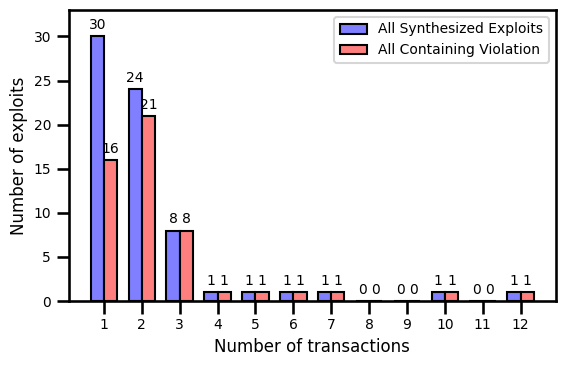

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Data
all_synthesized_exploits = {1: 30, 2: 24, 3: 8, 6: 1, 7: 1, 10: 1, 4: 1, 12: 1, 5: 1}
all_containing_violation = {2: 21, 3: 8, 1: 16, 6: 1, 7: 1, 10: 1, 4: 1, 12: 1, 5: 1}

# Create a range of keys that includes all integers between the lowest and highest keys
min_key = min(all_synthesized_exploits.keys())
max_key = max(all_synthesized_exploits.keys())
full_keys = list(range(min_key, max_key + 1))

# Values
synthesized_values = [all_synthesized_exploits.get(key, 0) for key in full_keys]
violation_values = [all_containing_violation.get(key, 0) for key in full_keys]

# Create bar chart
x = np.arange(len(full_keys))  # the label locations
width = 0.35  # the width of the bars

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(6, 4))

# Plot the bars with black borders
bars1 = ax.bar(x - width/2, synthesized_values, width, label='All Synthesized Exploits', color='#7F7FFF', edgecolor='black')
bars2 = ax.bar(x + width/2, violation_values, width, label='All Containing Violation', color='#FF7F7F', edgecolor='black')

# Add some text for labels and axes ticks
ax.set_xlabel('Number of transactions', fontsize=12)
ax.set_ylabel('Number of exploits', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(full_keys, fontsize=12)
ax.legend(fontsize=10)

# Adjusting tick parameters for smaller font size
ax.tick_params(axis='both', which='major', labelsize=10)

# Adding labels on top of the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

add_labels(bars1)
add_labels(bars2)

# Adjust the y-axis limit to prevent label overflow
ax.set_ylim(0, max(max(synthesized_values), max(violation_values)) * 1.1)

# Remove grid
ax.grid(False)

# Set white background
ax.set_facecolor('white')
fig.patch.set_facecolor('white')

# Improve the layout
fig.tight_layout()

# Save the plot as a PDF
plt.savefig("synthesized_exploits_vs_violations_no_grids_white_background.pdf", bbox_inches='tight')

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
all_synthesized_exploits = {1: 30, 2: 24, 3: 8, 6: 1, 7: 1, 10: 1, 4: 1, 12: 1, 5: 1}
all_containing_violation = {2: 21, 3: 8, 1: 16, 6: 1, 7: 1, 10: 1, 4: 1, 12: 1, 5: 1}

# Keys
keys = list(all_synthesized_exploits.keys())

# Values
synthesized_values = np.array([all_synthesized_exploits[key] for key in keys])
violation_values = np.array([all_containing_violation[key] for key in keys])
differences = synthesized_values - violation_values

# Create paired bar chart
x = np.arange(len(keys))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(6, 4))

bars1 = ax.bar(x - width/2, synthesized_values, width, label='All Synthesized Exploits', color='#4a90e2')
bars2 = ax.bar(x + width/2, violation_values, width, label='All Containing Violation', color='#d9534f')

# Plot differences as line with markers
ax.plot(x, differences, label='Difference (Synthesized - Violation)', color='green', marker='o', linestyle='dashed')

ax.set_xlabel('Keys', fontsize=14)
ax.set_ylabel('Values', fontsize=14)
ax.set_title('Paired Bar Chart with Differences', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(keys, fontsize=14)
ax.legend(fontsize=10)

# Adding labels on top of the bars
def add_labels(bars, ax):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

add_labels(bars1, ax)
add_labels(bars2, ax)

# Adding labels on the line
for i in range(len(differences)):
    ax.annotate(f'{differences[i]}', xy=(x[i], differences[i]), xytext=(0, -12), textcoords="offset points", ha='center', fontsize=8, color='green')

fig.tight_layout()
plt.show()


## TVL and attack data

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import pandas as pd

# Data provided
data = {
    "Date": [
        "Feb 2021", "Mar 2021", "Apr 2021", "May 2021", "Jun 2021", "Jul 2021", "Aug 2021", "Sep 2021", "Oct 2021", "Nov 2021", "Dec 2021",
        "Jan 2022", "Feb 2022", "Mar 2022", "Apr 2022", "May 2022", "Jun 2022", "Jul 2022", "Aug 2022", "Sep 2022", "Oct 2022", "Nov 2022", "Dec 2022",
        "Jan 2023", "Feb 2023", "Mar 2023", "Apr 2023", "May 2023", "Jun 2023", "Jul 2023", "Aug 2023", "Sep 2023", "Oct 2023", "Nov 2023", "Dec 2023",
        "Jan 2024", "Feb 2024", "Mar 2024", "Apr 2024", "May 2024"
    ],
    "Total Value Hacked (USD)": [
        63.8, 72.2, 138.4, 163.98, 38.58, 31.96, 675.85, 191.55, 298, 108.9, 506.95,
        131.64, 359.9, 692.81, 210, 106.8, 135.5, 18.3, 200.78, 160.83, 732.8, 512.85, 18.86,
        8.63, 30.61, 213.58, 60.91, 16.62, 103.03, 238.42, 21.04, 308.23, 3.47, 331.25, 85.82,
        20.98, 32.85, 85.04, 63.11, 67.9
    ]
}

# Convert the date strings to datetime objects
data['Date'] = [datetime.strptime(date, "%b %Y") for date in data['Date']]

# Create a DataFrame
df = pd.DataFrame(data)

# Plotting the data
fig, ax = plt.subplots(figsize=(6, 4), facecolor='white')


# Bar plot with adjusted width and color scheme
bars = ax.bar(df['Date'], df['Total Value Hacked (USD)'], color='#e74c3c', label='Total value stolen', width=20)

# Format the dates on the x-axis
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45, fontsize=9)

# Add labels with increased font size
ax.set_xlabel('Date', fontsize=9)
ax.set_ylabel('Total Value Hacked (in million USD)', fontsize=9)

# Remove grid
ax.grid(False)

# Customize colors and styles to match the provided plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)
ax.yaxis.tick_left()
ax.xaxis.tick_bottom()

plt.tight_layout()

# Save the plot as SVG
output_path = "Monthly_Total_Value_Hacked_DeFi_Protocols_Poster_No_Title.svg"
plt.savefig(output_path, format="svg")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import pandas as pd

# Data provided
data = {
    "Date": [
        "Feb 2021", "Mar 2021", "Apr 2021", "May 2021", "Jun 2021", "Jul 2021", "Aug 2021", "Sep 2021", "Oct 2021", "Nov 2021", "Dec 2021",
        "Jan 2022", "Feb 2022", "Mar 2022", "Apr 2022", "May 2022", "Jun 2022", "Jul 2022", "Aug 2022", "Sep 2022", "Oct 2022", "Nov 2022", "Dec 2022",
        "Jan 2023", "Feb 2023", "Mar 2023", "Apr 2023", "May 2023", "Jun 2023", "Jul 2023", "Aug 2023", "Sep 2023", "Oct 2023", "Nov 2023", "Dec 2023",
        "Jan 2024", "Feb 2024", "Mar 2024", "Apr 2024", "May 2024"
    ],
    "Total Value Hacked (USD)": [
        63.8, 72.2, 138.4, 163.98, 38.58, 31.96, 675.85, 191.55, 298, 108.9, 506.95,
        131.64, 359.9, 692.81, 210, 106.8, 135.5, 18.3, 200.78, 160.83, 732.8, 512.85, 18.86,
        8.63, 30.61, 213.58, 60.91, 16.62, 103.03, 238.42, 21.04, 308.23, 3.47, 331.25, 85.82,
        20.98, 32.85, 85.04, 63.11, 67.9
    ]
}

# Convert the date strings to datetime objects
data['Date'] = [datetime.strptime(date, "%b %Y") for date in data['Date']]

# Create a DataFrame
df = pd.DataFrame(data)

# Plotting the data
fig, ax = plt.subplots(figsize=(6, 4), facecolor='white')

# Bar plot with adjusted width and color scheme
bars = ax.bar(df['Date'], df['Total Value Hacked (USD)'], color='#e74c3c', label='Total value stolen', width=20)

# Format the dates on the x-axis
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45, fontsize=9)

# Set x-axis limits to avoid extra space
ax.set_xlim([df['Date'].min() - pd.DateOffset(days=15), df['Date'].max() + pd.DateOffset(days=15)])

# Add labels with increased font size
ax.set_xlabel('Date', fontsize=11)
ax.set_ylabel('Total Value Hacked (in million USD)', fontsize=11)

# Remove grid
ax.grid(False)

# Customize colors and styles to match the provided plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)
ax.yaxis.tick_left()
ax.xaxis.tick_bottom()

plt.tight_layout()

# Save the plot as SVG
output_path = "Monthly_Total_Value_Hacked_DeFi_Protocols_Poster_No_Title.pdf"
plt.savefig(output_path, format="pdf")
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'chain-dataset-All.csv'  # Replace with the path to your CSV file
df = pd.read_csv(file_path)

# Convert the date columns to datetime format
df = df.set_index('Protocol')
df.columns = pd.to_datetime(df.columns, format='%d/%m/%Y')

# Filter the 'Total' row which seems to represent the overall TVL
total_tvl = df.loc['Total'].dropna()

# Convert TVL to billions for conciseness
total_tvl_in_billion = total_tvl / 1e9

# Increase font sizes for labels and create the plot without title
fig, ax = plt.subplots(figsize=(6, 4), facecolor='white')
ax.plot(total_tvl_in_billion.index, total_tvl_in_billion.values, color='blue', linewidth=2.5)
ax.set_xlabel('Date', fontsize=11)
ax.set_ylabel('TVL (in Billions USD)', fontsize=11)
ax.tick_params(axis='x', rotation=45, labelsize=11)
ax.tick_params(axis='y', labelsize=11)
ax.grid(False)
plt.tight_layout()

# Save the plot to a PDF file
pdf_file_path = 'Total_Value_Locked_TVL_Over_Time.pdf'
fig.savefig(pdf_file_path, format='pdf')

print(f"PDF file saved to {pdf_file_path}")


In [ ]:
from datetime import datetime, timedelta
import pytz

def unix_to_iso_duration(block_timestamp):
    # Define the CEST timezone
    cest = pytz.timezone('utc')
    
    # Get the current time in CEST
    current_time = datetime.now(cest)
    print('current time (CEST): ' + str(current_time))
    print('current time (Unix timestamp): ' + str(current_time.timestamp()))
    current_unix_time = int(current_time.timestamp())
    
    # Calculate the time difference
    time_diff = block_timestamp - current_unix_time
    
    # Convert the time difference into a timedelta object
    duration = timedelta(seconds=time_diff)
    
    # Calculate the duration components
    days = duration.days
    seconds = duration.seconds
    hours = seconds // 3600
    minutes = (seconds % 3600) // 60
    seconds = seconds % 60

    print('duration is: ' + str(hours))
    
    # Create the ISO 8601 duration string
    iso_duration = f"P{days}DT{hours}H{minutes}M{seconds}S"
    
    return iso_duration

block_timestamp = 1716552636
iso_duration = unix_to_iso_duration(block_timestamp)
print(f"ISO 8601 Duration: {iso_duration}")


## Total loss due to all types of attacks (fetched May 29, 2024)

In [ ]:
losses = [
    ('USD', 490000),
    ('ETH', 1.7),
    ('USD', 20000000),
    ('USD', 464000),
    ('USD', 330000),
    ('USD', 140000),
    ('USD', 32000),
    ('BNB', 15),
    ('USD', 109000),
    ('USD', 181000),
    ('USD', 1400000),
    ('USD', 190000),
    ('USD', 200000),
    ('USD', 150000),
    ('USD', 136000),
    ('USD', 36000),
    ('USD', 48000000),
    ('BNB', 50),
    ('USD', 100000),
    ('USD', 200000),
    ('BNB', 14),
    ('USD', 350000),
    ('BNB', 150),
    ('USD', 28000),
    ('USD', 87000),
    ('USD', 18000),
    ('USD', 182000),
    ('USD', 234000),
    ('USD', 11000000),
    ('USD', 340000),
    ('USD', 223000),
    ('USD', 4800000),
    ('BNB', 348),
    ('USD', 24000),
    ('USDT', 413000),
    ('USDT', 13000),
    ('ETH', 54),
    ('USD', 2000000),
    ('USD', 57000),
    ('USD', 10000),
    ('USD', 150000),
    ('USD', 8000000),
    ('USD', 6000000),
    ('USD', 439537),
    ('USD', 1400000),
    ('USD', 170000),
    ('ETH', 6.4),
    ('USD', 10000),
    ('USD', 50000),
    ('USD', 42000),
    ('USD', 150000),
    ('ETH', 20),
    ('USD', 200000),
    ('USD', 17000),
    ('USD', 67000),
    ('USD', 88000),
    ('USD', 6500000),
    ('USD', 130000),
    ('USD', 93000),
    ('USD', 180000),
    ('USD', 319000),
    ('USD', 114000),
    ('USD', 3300000),
    ('USD', 464000),
    ('USD', 6300000),
    ('USD', 500000),
    ('USD', 4500000),
    ('USD', 81000000)
]

conversion_rates = {
    'ETH': None,
    'BNB': None,
    'USDT': 1  # USDT is a stablecoin, so 1 USDT = 1 USD
}
conversion_rates['ETH'] = 3844  # Example price in USD
conversion_rates['BNB'] = 600   # Example price in USD


total_usd = 0

for unit, amount in losses:
    if unit == 'USD' or unit == 'USDT':
        total_usd += amount
    elif unit == 'ETH':
        total_usd += amount * conversion_rates['ETH']
    elif unit == 'BNB':
        total_usd += amount * conversion_rates['BNB']

total_usd


## Jaccard Similiarity Checking Between the Original Contract and Attacker  

In [ ]:
!pip install datasets==2.0.0
!pip install fastparquet==0.8.0
!pip install pandas==1.4.1
!pip install py-etherscan-api==0.8.0
!pip install pyarrow==7.0.0
!pip install git+https://github.com/tqdm/tqdm.git@refs/pull/1054/head
!pip install textdistance[extras]
!pip install antlr4-python3-runtime==4.9.3


In [ ]:
!pip install textdistance

In [ ]:
import re
import json
from json.decoder import JSONDecodeError


class ContractFileHandler():

    def __init__(self, code_format, file_extension):
        self.code_format = code_format
        self.file_extension = file_extension

    def extract(self, data):
        """
        Extracts files from the source code
        """
        extracted_files = []
        do = f"_extract_{self.code_format.lower()}_files"
        if hasattr(self, do) and callable(func := getattr(self, do)):
            files = func(data)
            for item in files:
                if item['source_code'] == '':
                    continue
                extracted_files.append(item)
        else:
            raise Exception(f"No extractor for {self.code_format} format")

        return extracted_files

    def _extract_text_files(self, data):
        files = []
        files_code = re.split(
            '\/\/ File:? (.*' + re.escape(self.file_extension) + ')', data)

        # Single file
        if len(files_code) == 1:
            files.append({'file_path': '', 'source_code': data})
            return files

        # Combined file
        for index, file in enumerate(files_code):
            if index % 2 == 0:
                continue

            file_path = ''
            if len(file) > 1:
                # File name is every other element in files_code array, except for the first element.
                file_path = file
                source_code = files_code[index+1].strip()
            else:
                source_code = file

            files.append({'file_path': file_path, 'source_code': source_code})

        return files

    def _extract_multi_files(self, data):
        files = []
        try:
            record_json = json.loads(data)
        except JSONDecodeError as e:
            print("Can't decode JSON:" + str(e.msg))
            return []

        for file_path, source in record_json.items():
            source_code = source['content']
            files.append({'file_path': file_path, 'source_code': source_code})
        return files

    def _extract_json_files(self, data):
        files = []
        try:
            record_json = json.loads(data)
        except JSONDecodeError as e:
            print("Can't decode JSON:" + str(e.msg))
            return []

        files_code = record_json['sources']
        for file_path, source in files_code.items():
            source_code = source['content']
            files.append({'file_path': file_path, 'source_code': source_code})
        return files


def str2bool(v):
    return str(v).lower() in ("yes", "true", "t", "1")

In [ ]:

import pandas as pd


class Contract():

    labels = {
        'contract_name',
        'file_path',
        'contract_address',
        'language',
        'source_code',
        'abi',
        'compiler_version',
        'optimization_used',
        'runs',
        'constructor_arguments',
        'evm_version',
        'library',
        'license_type',
        'proxy',
        'implementation',
        'swarm_source'
    }

    etherscan_col_map = {
        'ContractName': 'contract_name',
        'SourceCode': 'source_code',
        'ABI': 'abi',
        'CompilerVersion': 'compiler_version',
        'OptimizationUsed': 'optimization_used',
        'Runs': 'runs',
        'ConstructorArguments': 'constructor_arguments',
        'EVMVersion': 'evm_version',
        'Library': 'library',
        'LicenseType': 'license_type',
        'Proxy': 'proxy',
        'Implementation': 'implementation',
        'SwarmSource': 'swarm_source',
    }

    def __init__(
        self,
        contract_name: str = None,
        file_path: str = None,
        contract_address: str = None,
        language: str = None,
        source_code: str = None,
        abi: str = None,
        compiler_version: str = None,
        optimization_used: bool = None,
        runs: int = None,
        constructor_arguments: str = None,
        evm_version: str = None,
        library: str = None,
        license_type: str = None,
        proxy: int = None,
        implementation: str = None,
        swarm_source: str = None
    ):
        # Initialize all fields to None
        self._data = {
            'contract_name': contract_name,
            'file_path': file_path,
            'contract_address': contract_address,
            'language': language,
            'source_code': source_code,
            'abi': abi,
            'compiler_version': compiler_version,
            'optimization_used': str2bool(optimization_used),
            'runs': int(runs) if runs else None,
            'constructor_arguments': constructor_arguments,
            'evm_version': evm_version,
            'library': library,
            'license_type': license_type,
            'proxy': str2bool(proxy),
            'implementation': implementation,
            'swarm_source': swarm_source,
        }

        self.code_format = None
        self.files = []
        if self._data["source_code"]:
            self._process_source_code()

        # Try to infer the contract file name from the contract name
        if len(self.files) == 1:
            # TODO: Assess if this is necessary
            self._data["file_path"] = self._data["file_path"] or self._data["contract_name"] + \
                self.get_file_extension()

    def __str__(self):
        return self._data["contract_name"]

    def __repr__(self):
        # pd.Series(self.__dict__).to_string()
        return self._data["contract_name"] + " - " + str(self._data["file_path"])

    def __getitem__(self, key):
        return self._data[key]

    @classmethod
    def from_dict(cls, dict: dict):
        df = {}
        for k, v in dict.items():
            if k in cls.labels:
                df[k] = v
            else:
                raise AttributeError("Unknown attribute: %s" % k)

        return cls(**df)

    @classmethod
    def from_etherscan_dict(cls, address: str, dict: dict):
        df = {}
        for k, v in dict.items():
            if k in cls.etherscan_col_map:
                df[cls.etherscan_col_map[k]] = v
            else:
                raise AttributeError("Unknown Etherscan attribute: %s" % k)

        return cls(contract_address=address, **df)

    def _process_source_code(self):
        # Check for Solidity Standard Json-Input format
        if "vyper" in self._data["compiler_version"]:
            self.code_format = "Text"
            self._data["language"] = "Vyper"

        elif self._data["source_code"][:2] == "{{":
            # Fix JSON by removing extranous curly brace
            self._data["source_code"] = self._data["source_code"][1:-1]
            self.code_format = "JSON"
            self._data["language"] = "Solidity"

        elif self._data["source_code"][:1] == "{":
            self.code_format = "Multi"
            self._data["language"] = "Solidity"

        else:
            self.code_format = "Text"
            self._data["language"] = "Solidity"

        handler = ContractFileHandler(
            self.code_format, self.get_file_extension())
        self.files = handler.extract(self._data["source_code"])

    def get_file_extension(self):
        if self._data["language"] == "Solidity":
            return ".sol"
        elif self._data["language"] == "Vyper":
            return ".vy"
        else:
            return ""

    def explode(self):
        """
        Extracts contracts from the source code
        """
        contracts = []
        for file in self.files:
            data = self._data.copy()
            data["source_code"] = file['source_code']
            data["file_path"] = file['file_path']
            contract = Contract(**data)
            contracts.append(contract)
        return contracts

    def normalize(self):
        """
        Produces a single contract source code from all files in the contract.
        """
        if self.code_format != "Text":
            source_code = []
            for file in self.files:
                if file['file_path']:
                    source_code.append(
                        "// File: " + file['file_path'] + "\n\n\n")
                    source_code.append(file['source_code'])
                else:
                    source_code.insert(0, file['source_code'])
            self._data["source_code"] = "\n".join(source_code)
            self.code_format = "Text"

        # Reset filename
        self._data["file_path"] = ""

        return self

    def to_dict(self, labels=None):
        data = self._data.copy()
        if labels:
            data = {key: value for key, value in data.items() if key in labels}
        return data



In [ ]:

from typing import Iterable
import tqdm
import pandas as pd

def merge_filter(iterable: Iterable[pd.DataFrame], filter: callable ) -> pd.DataFrame:
    """s
    This function merges two dataframes and filters out duplicates.
    """
    levels: list[int] = []
    frames: list[pd.DataFrame] = []
    for df in iterable:
        df = filter(df)
        
        frames.append(df)
        levels.append(1)

        # Merge all df at same levels
        merge(frames, levels, filter)
    merge(frames, levels, filter, force=True)
    df = frames[0]
    df.reset_index(drop=True, inplace=True)
    return df

        

In [ ]:
from multiprocessing import Pool, cpu_count
from typing import Iterable
import pandas as pd
from pathlib import Path
from datasets import Dataset
from tqdm import tqdm
import textdistance
from functools import partial
import itertools
import glob
import logging
import numpy as np

log = logging.getLogger("data-processor")


def find_dupes(column, threshold, df):
    if df.shape[0] <= 1:
        return []

    dupe_indexes = []
    jaccard = textdistance.Jaccard()
    first_row = None
    for i, row in df.iterrows():
        if first_row is None:
            first_row = row
            continue
        if column is None or row[column] == first_row[column]:
            jaccard_score = jaccard(first_row.source_code, row.source_code)
            if jaccard_score > threshold:
                dupe_indexes.append(i)
    return dupe_indexes


class DataProcessor():

    def __init__(self, dir_path: str, chunk_size: int):

        self.dir_path = dir_path
        self.chunk_size = chunk_size

        self._buffer = None
        self._unique_file_names = pd.Series(dtype=str)

        self.dupes_count = 0
        self.count = 0

        self.pbar = None

    def reset(self):
        self._buffer = None
        self.dupes_count = 0
        self.count = 0
        self._unique_file_names = pd.Series(dtype=str)

    def _read_parquet(self, dir_path):
        """
        TODO: Write docstring
        """
        files_count = sum(1 for f in Path(dir_path).glob("*.parquet"))
        self.pbar = tqdm(desc="Processing", total=files_count)

        index = 0
        while True:
            file_path = Path(dir_path, "part." +
                             str(index) + ".parquet").resolve()
            if file_path.exists():
                shard = pd.read_parquet(file_path)
                index += 1
                yield shard
            else:
                return

    def _explode_files(self, df):
        """
        Extracts contracts from the source code
        """
        contracts = []
        for _, row in df.iterrows():
            c_files = Contract(**row).explode()
            c_files = [c.to_dict() for c in c_files]
            contracts.extend(c_files)
        df = pd.DataFrame(contracts)
        return df

    def applyParallel(self, iterable, total, func, chunksize=1):
        with Pool() as p:            
            res_list = []
            with tqdm(total=total, desc="Filtering", leave=False) as pbar:
                for res in p.imap_unordered(func=func, iterable=iterable, chunksize=chunksize):
                    pbar.update()
                    res_list.append(res)
            
        return list(itertools.chain.from_iterable(res_list))

    def _uniqify(self, df: pd.DataFrame, threshold=0.9, grouping_column=None) -> pd.DataFrame:
        
        # Drop pure duplicates.
        size = df.shape[0]
        df.drop_duplicates(subset=['source_code'], keep='first', inplace=True)
        self.dupes_count += size - df.shape[0]

        if grouping_column:
            shuffled_df = df.sample(frac=1, ignore_index=False)
            df_group = shuffled_df.groupby(grouping_column)
            iterable = [group for name, group in df_group]
            func = partial(find_dupes, grouping_column, threshold)
            match_indexes = self.applyParallel(iterable, len(iterable), func, 100)
        else:
            iterable = self.brute_force_gen(df)
            func = partial(find_dupes, None, threshold)
            match_indexes = self.applyParallel(iterable, df.shape[0], func, 1)
        
        df.drop(match_indexes, inplace=True)


        self.dupes_count += len(match_indexes)
        
        dupes=str(self.dupes_count) + "/" + str(self.count)
        dupes_percentage=str(round(self.dupes_count*100/self.count, 2)) + "%"
        self.pbar.set_postfix(
            dupes=dupes + " (" + str(dupes_percentage) + ")"
            )
        
        return df
    
    def brute_force_gen(self, df: pd.DataFrame):
        for i in range(df.shape[0]):
            yield df.iloc[i:]
    
    def _uniqify_filename(self, df: pd.DataFrame) -> pd.DataFrame:
        """
        Deprecated
        """
        file_names = df.apply(lambda row: row.file_path.split("/")[-1], axis=1)
        df["file_name"] = file_names

        dupes = df["file_name"].isin(self._unique_file_names)
        # Keep empty filennames, as well as all the vyper files with standard contract name (Etherscan).

        dupes[(df['file_name'] == '') | (
            df['file_name'] == 'Vyper_contract.vy')] = False
        df = df[~dupes]
        # Keeping first since all_contracts is sorted on most transactions first.
        df = df.drop_duplicates(subset=['file_name'], keep='first')

        self._unique_file_names = pd.concat(
            [self._unique_file_names, file_names], axis=0, ignore_index=True).drop_duplicates()
        return df

    def process(self, split_files: bool, threshold: float) -> Iterable[Dataset]:
        self.reset()
        log.info("Generating dataset")
        log.info("Split files: " + str(split_files))
        log.info("Similarity threshold: " + str(threshold))
        data_gen = self._read_parquet(self.dir_path)
        
        def add_file_name(df):
            df["file_name"] = df.apply(
                lambda row: row.file_path.split("/")[-1], axis=1)
            return df

        if split_files:
            # Split contracts into files
            files_gen = map(self._explode_files, data_gen)
            data_gen = map(add_file_name, files_gen)  # Add tmp file_name column

        data_gen = map(lambda df: (self.pbar.update(1), df)[-1], data_gen)  # Update progress bar
        data_gen = map(lambda df: (setattr(self, 'count', (self.count + df.shape[0])), df)[-1], data_gen)  # Update counter

        if threshold: 
            grouping_column = "file_name" if split_files else "contract_name"
            filter_func = partial(
                self._uniqify, threshold=threshold, grouping_column=grouping_column)
            df = merge_filter(data_gen, filter_func) # Merge and filter data
            
            #df = self._uniqify(df=df, threshold=threshold, grouping_column=None) # Filter again without grouping (VERY COSTLY) ((n-1)^2)/cpus
            
            if split_files:
                df.drop(columns='file_name', inplace=True)  # Drop tmp file_name column
            
            return self.chunk_gen(df)
        else:
            return self.resample(data_gen)

    def resample(self, iterator: Iterable) -> Iterable[Dataset]:
        for batch in iterator:
            chunk = self.chunk(batch)
            if chunk is not None:
                yield chunk
            else:
                continue

            if self._buffer is not None:
                while self._buffer.shape[0] > self.chunk_size:
                    chunk = self._buffer.iloc[:self.chunk_size]
                    self._buffer = self._buffer.iloc[self.chunk_size:]
                    yield chunk

        # Always serve the "remainder" batch
        if self._buffer is not None:
            yield self._buffer

    
    def plain_text(self) -> Iterable[Dataset]:
        """
        This function takes a list of strings and returns a list of strings
        with duplicates removed.
        """
        self.reset()
        log.info("Generating \"plain_text\" dataset")

        data_gen = self._read_parquet(self.dir_path)
        data_gen = map(lambda df: (self.pbar.update(1), df)
                             [-1], data_gen)  # Update progress bar
        
        def convert_plain_text(df: pd.DataFrame) -> pd.DataFrame:
            df = df.rename(columns={'source_code': 'text'})
            df = df[['text', 'language']]
            return df

        # Add tmp file_name column
        plain_text_gen = map(convert_plain_text, data_gen)
        return plain_text_gen

    def chunk_gen(self, df: pd.DataFrame) -> Iterable[Dataset]:
        i = 0
        while i < df.shape[0]:
            yield df.iloc[i:i + self.chunk_size]
            i += self.chunk_size

    def chunk(self, df: pd.DataFrame) -> pd.DataFrame:
        """
        This function rebalances the dataset.
        """

        if self._buffer is not None:
            df = pd.concat([self._buffer, df], axis=0, ignore_index=True)

        if df.shape[0] < self.chunk_size:
            # If the batch is smaller than the chunk size,
            # we buffer it and add it to the next batch.
            self._buffer = df
            return
        else:
            # If the batch is larger than the chunk size,
            # we split it into chunks of size chunk_size.
            chunk = df.iloc[:self.chunk_size]
            self._buffer = df.iloc[self.chunk_size:]
            return chunk

In [ ]:
!pip install --upgrade pandas

In [ ]:
import os
import json
import pandas as pd
from pathlib import Path
from tqdm import tqdm
import textdistance

def read_files_from_directory(directory):
    file_contents = []
    file_names = []
    for file_path in Path(directory).glob("*.sol"):
        with open(file_path, 'r', encoding='utf-8') as file:
            file_contents.append(file.read())
            file_names.append(file_path.name)
    return file_names, file_contents

def calculate_jaccard_similarity(source, target):
    jaccard = textdistance.Jaccard()
    return jaccard(source, target)

def compare_files(original_files, variant_files):
    results = []
    with tqdm(total=len(original_files) * len(variant_files), desc="Comparing Files") as pbar:
        for orig_name, orig_content in original_files:
            for var_name, var_content in variant_files:
                similarity = calculate_jaccard_similarity(orig_content, var_content)
                results.append({
                    'original_file': orig_name,
                    'variant_file': var_name,
                    'jaccard_similarity': similarity
                })
                pbar.update(1)
    return results

def load_existing_results(output_file):
    if Path(output_file).exists():
        with open(output_file, 'r', encoding='utf-8') as f:
            return json.load(f)
    return []

def main(original_dir, variant_dir, output_file):
    original_names, original_contents = read_files_from_directory(original_dir)
    variant_names, variant_contents = read_files_from_directory(variant_dir)
    
    original_files = list(zip(original_names, original_contents))
    variant_files = list(zip(variant_names, variant_contents))

    new_results = compare_files(original_files, variant_files)
    print(new_results)
    
    # Load existing results
    existing_results = load_existing_results(output_file)
    
    # Append new results to existing results
    all_results = existing_results + new_results
    
    # Save combined results to JSON
    with open(output_file, 'w', encoding='utf-8') as f:
        json.dump(all_results, f, ensure_ascii=False, indent=4)
    print(f"Results saved to {output_file}")

if __name__ == "__main__":
    original_dir = "original/ProductOrder"
    variant_dir = "variants/ProductOrder"
    output_file = "jaccard_similarity_results.json"
    
    main(original_dir, variant_dir, output_file)


## Relationship of Similarity index and Compilability

In [ ]:
!pip uninstall -y scipy
!pip uninstall -y numpy
!pip install numpy
!pip install scipy

In [5]:
import pandas as pd
import json
import os

# Load Jaccard similarity data
with open('jaccard_similarity_results.json') as f:
    jaccard_data = json.load(f)

jaccard_df = pd.DataFrame(jaccard_data)

# Load compilability data
compilable_files = ['compilable-Governance.json', 'compilable-Escrow.json', 'compilable-MultiStageAuction.json', 'compilable-PrizeDistribution.json', 'compilable-ProductOrder.json'] 
compilable_data = []

for file in compilable_files:
    with open(os.path.join('results', file)) as f:
        data = json.load(f)
        for contract in data['compilableContracts']:
            compilable_data.append({
                'variant_file': contract['file'],
                'compilable': True
            })

compilable_df = pd.DataFrame(compilable_data)

# Merge dataframes on variant_file
merged_df = pd.merge(jaccard_df, compilable_df, on='variant_file', how='left')
merged_df['compilable'] = merged_df['compilable'].fillna(False)


In [6]:
# Basic statistics
compilable_stats = merged_df[merged_df['compilable'] == True]['jaccard_similarity'].describe()
non_compilable_stats = merged_df[merged_df['compilable'] == False]['jaccard_similarity'].describe()

# Correlation analysis
correlation = merged_df[['jaccard_similarity', 'compilable']].corr()


In [7]:
print(f"correlation: \n{correlation}")

correlation: 
                    jaccard_similarity  compilable
jaccard_similarity            1.000000   -0.109266
compilable                   -0.109266    1.000000


In [8]:
from scipy.stats import ttest_ind

compilable_similarities = merged_df[merged_df['compilable'] == True]['jaccard_similarity']
non_compilable_similarities = merged_df[merged_df['compilable'] == False]['jaccard_similarity']

t_stat, p_value = ttest_ind(compilable_similarities, non_compilable_similarities)


In [10]:
print(f"t_stat: {t_stat}, p_value: {p_value}")

t_stat: -1.1101745271010064, p_value: 0.26953418207942437


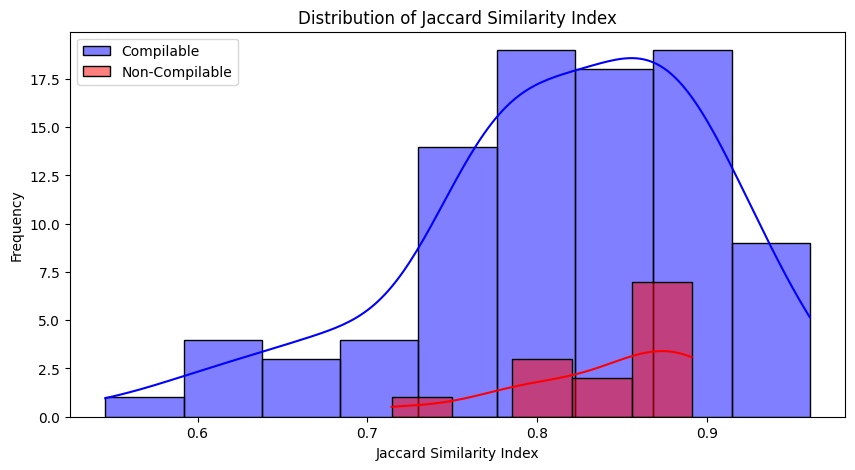

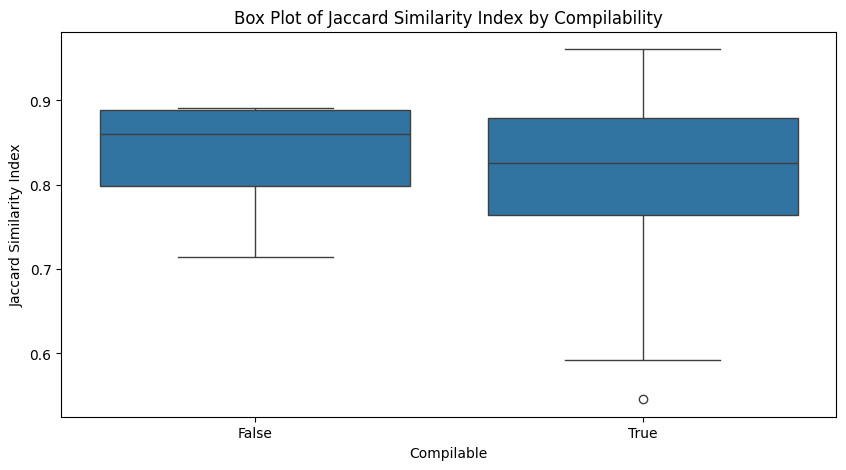

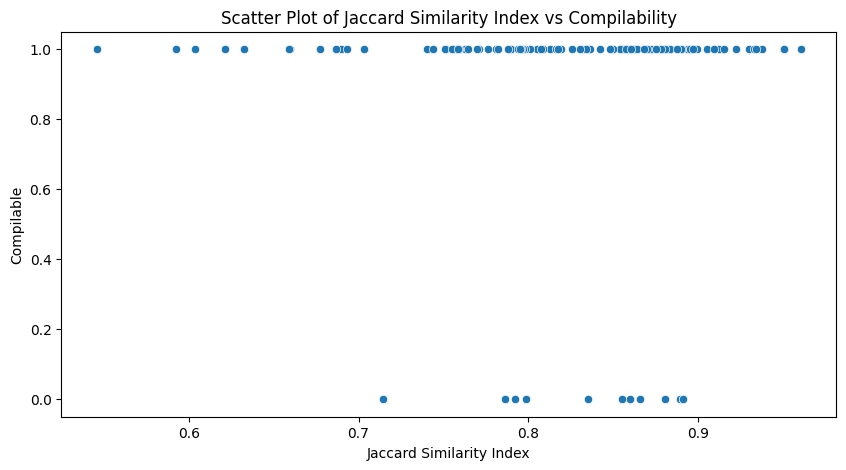

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
plt.figure(figsize=(10, 5))
sns.histplot(compilable_similarities, color='blue', label='Compilable', kde=True)
sns.histplot(non_compilable_similarities, color='red', label='Non-Compilable', kde=True)
plt.title('Distribution of Jaccard Similarity Index')
plt.xlabel('Jaccard Similarity Index')
plt.ylabel('Frequency')
plt.legend()
# plt.show()

# # Box plots
# plt.figure(figsize=(10, 5))
# sns.boxplot(x='compilable', y='jaccard_similarity', data=merged_df)
# plt.title('Box Plot of Jaccard Similarity Index by Compilability')
# plt.xlabel('Compilable')
# plt.ylabel('Jaccard Similarity Index')
# plt.show()

# # Scatter plot
# plt.figure(figsize=(10, 5))
# sns.scatterplot(x='jaccard_similarity', y='compilable', data=merged_df)
# plt.title('Scatter Plot of Jaccard Similarity Index vs Compilability')
# plt.xlabel('Jaccard Similarity Index')
# plt.ylabel('Compilable')
# plt.show()


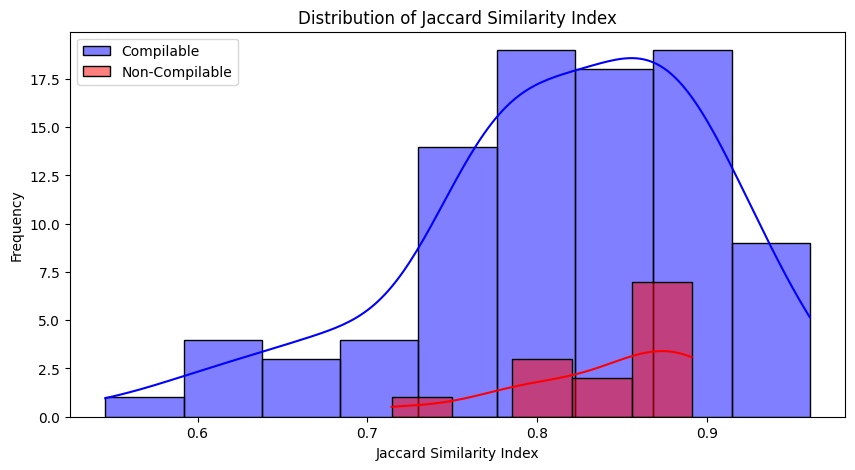

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
plt.figure(figsize=(10, 5))
sns.histplot(compilable_similarities, color='blue', label='Compilable', kde=True)
sns.histplot(non_compilable_similarities, color='red', label='Non-Compilable', kde=True)
plt.title('Distribution of Jaccard Similarity Index')
plt.xlabel('Jaccard Similarity Index')
plt.ylabel('Frequency')
plt.legend()

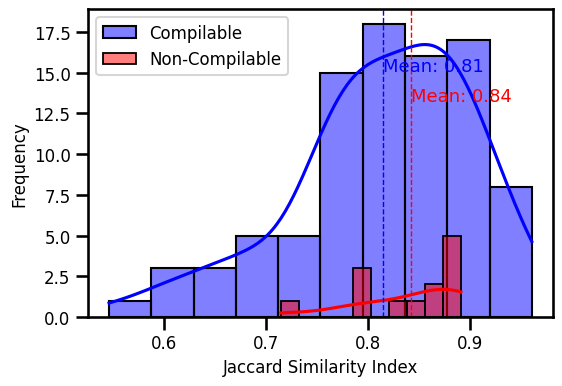

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate key statistics
mean_compilable = compilable_similarities.mean()
mean_non_compilable = non_compilable_similarities.mean()

# Set plot size and font sizes
plt.figure(figsize=(6, 4))
sns.set_context("talk")  # Increase font sizes

# Histograms with enhancements
sns.histplot(compilable_similarities, color='blue', label='Compilable', kde=True, alpha=0.5, bins=10)  # Increased number of bins for more granularity
sns.histplot(non_compilable_similarities, color='red', label='Non-Compilable', kde=True, alpha=0.5, bins=10)  # Increased number of bins for more granularity

# Add lines for means
plt.axvline(mean_compilable, color='blue', linestyle='dashed', linewidth=1)
plt.axvline(mean_non_compilable, color='red', linestyle='dashed', linewidth=1)

# Annotations
plt.text(mean_compilable, plt.ylim()[1]*0.8, f'Mean: {mean_compilable:.2f}', color='blue', fontsize=13)
plt.text(mean_non_compilable, plt.ylim()[1]*0.7, f'Mean: {mean_non_compilable:.2f}', color='red', fontsize=13)

# Additional plot enhancements
#plt.title('Distribution of Jaccard Similarity Index by Compilability', fontsize=14)
plt.xlabel('Jaccard Similarity Index', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=12)

# Adjust the font size of the axis numbers
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=10)

plt.grid(False)  # Remove grid lines

# Save the plot as a PDF
plt.savefig('Jaccard_Similarity_Distribution.pdf')

# Display the plot
plt.show()

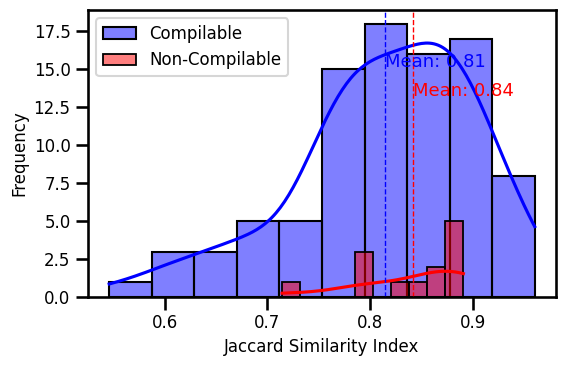

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate key statistics
mean_compilable = compilable_similarities.mean()
mean_non_compilable = non_compilable_similarities.mean()

# Set plot size and font sizes
plt.figure(figsize=(6, 4))
sns.set_context("talk")  # Increase font sizes

# Histograms with enhancements
sns.histplot(compilable_similarities, color='blue', label='Compilable', kde=True, alpha=0.5, bins=10)  # Increased number of bins for more granularity
sns.histplot(non_compilable_similarities, color='red', label='Non-Compilable', kde=True, alpha=0.5, bins=10)  # Increased number of bins for more granularity

# Add lines for means
plt.axvline(mean_compilable, color='blue', linestyle='dashed', linewidth=1)
plt.axvline(mean_non_compilable, color='red', linestyle='dashed', linewidth=1)

# Annotations
plt.text(mean_compilable, plt.ylim()[1]*0.8, f'Mean: {mean_compilable:.2f}', color='blue', fontsize=13)
plt.text(mean_non_compilable, plt.ylim()[1]*0.7, f'Mean: {mean_non_compilable:.2f}', color='red', fontsize=13)

# Additional plot enhancements
plt.xlabel('Jaccard Similarity Index', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=12)

# Adjust the font size of the axis numbers
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=10)

plt.grid(False)  # Remove grid lines

# Adjust layout to prevent clipping
plt.tight_layout()

# Save the plot as a PDF
plt.savefig('Jaccard_Similarity_Distribution.pdf')

# Display the plot
plt.show()


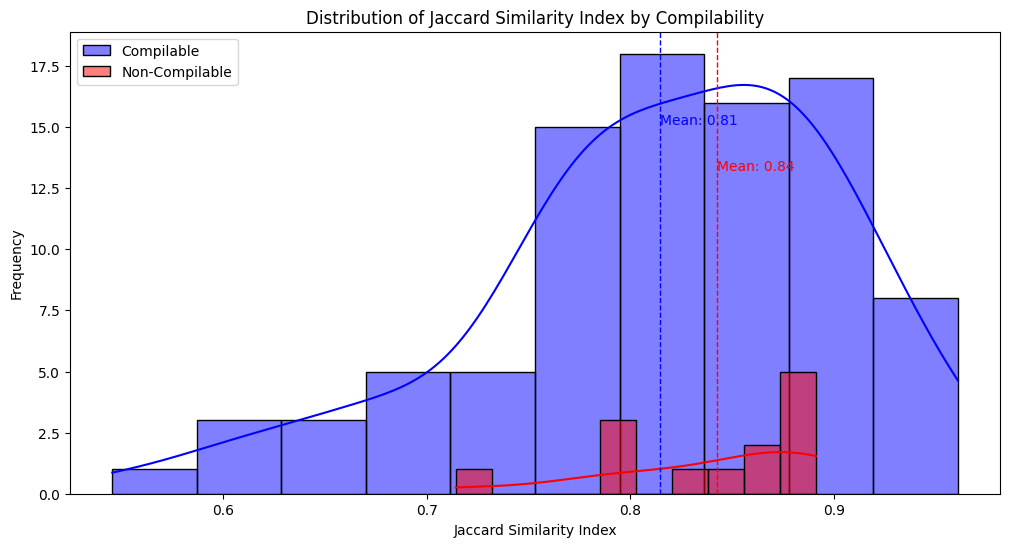

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate key statistics
mean_compilable = compilable_similarities.mean()
mean_non_compilable = non_compilable_similarities.mean()

# Histograms with enhancements
plt.figure(figsize=(12, 6))
sns.histplot(compilable_similarities, color='blue', label='Compilable', kde=True, alpha=0.5, bins=10)  # Increased number of bins for more granularity
sns.histplot(non_compilable_similarities, color='red', label='Non-Compilable', kde=True, alpha=0.5, bins=10)  # Increased number of bins for more granularity

# Add lines for means
plt.axvline(mean_compilable, color='blue', linestyle='dashed', linewidth=1)
plt.axvline(mean_non_compilable, color='red', linestyle='dashed', linewidth=1)

# Annotations
plt.text(mean_compilable, plt.ylim()[1]*0.8, f'Mean: {mean_compilable:.2f}', color='blue')
plt.text(mean_non_compilable, plt.ylim()[1]*0.7, f'Mean: {mean_non_compilable:.2f}', color='red')

# Additional plot enhancements
plt.title('Distribution of Jaccard Similarity Index by Compilability')
plt.xlabel('Jaccard Similarity Index')
plt.ylabel('Frequency')
plt.legend()
plt.grid(False)  # Remove grid lines
plt.show()
